# BIKE SHARING ASSIGNMENT

#### Problem Statement:

BoomBikes, a US-based bike-sharing provider, has seen a significant decline in revenue due to the pandemic and is struggling to sustain its business. The company aims to assess the demand for shared bikes once the pandemic subsides, using various factors to predict how demand will shift. They need to understand which variables affect bike demand to prepare for post-pandemic recovery.

#### Business Goal:
The goal is to build a model that predicts the demand for shared bikes based on key factors. This model will help BoomBikes adjust its business strategy, meet customer expectations, and understand demand patterns in new markets for future growth.

## Reading and Understanding the Data

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [5]:
# Reading the data
bikes=pd.read_csv('day.csv')
# Checking the head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikes.shape

(730, 16)

In [9]:
# Checking the column-wise information of bikes dataframe
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# Checking for the missing values
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

insight-There is no missing value in bikes datframe

In [15]:
# checking for duplicates and dropping if any
bikes.drop_duplicates(inplace=True)
bikes.shape

(730, 16)

In [ ]:
insight-shape of bikes is same after dropping duplicate, so we can say there is no duplicate

##### Dropping Unnecessary Variables

After reviewing the data, we can remove the following features as they are not useful:

- instant: This just shows the record index, which is already provided by the default index in pandas.
  
- dteday: This shows the date of the record, which is redundant because we already have the month (mnth) and year (yr) columns.


- casual & registered: These columns show the count of casual and registered users. However, the total count is already provided in the "cnt" column, so these two columns can be dropped.

In [17]:
bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data preparation and EDA 

#### doing univariate analysis of some variable & checking for outliers

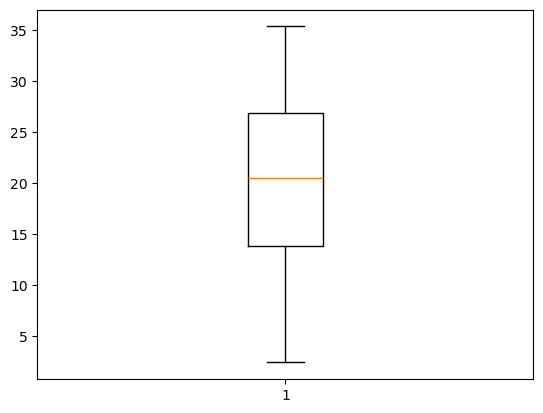

In [19]:
plt.boxplot(bikes['temp'])
plt.show()

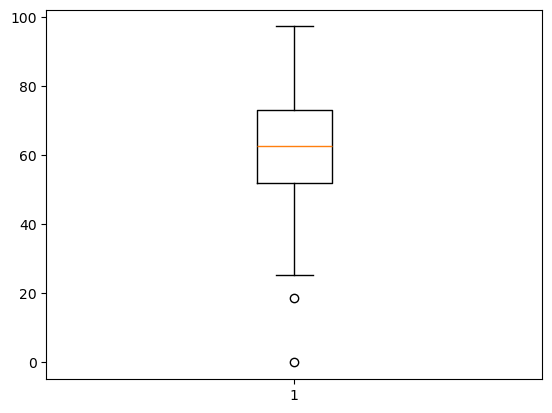

In [21]:
plt.boxplot(bikes['hum'])
plt.show()

In [ ]:
plt.boxplot(bikes['temp'])
plt.show()

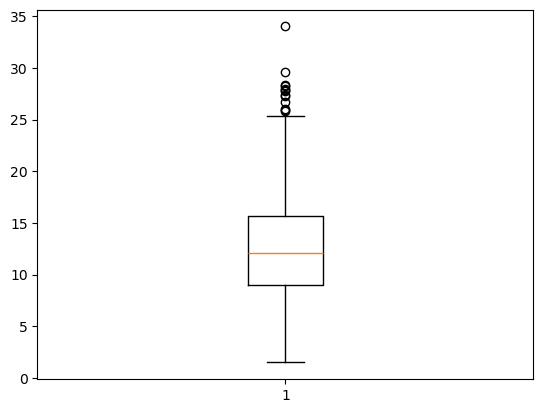

In [23]:
plt.boxplot(bikes['windspeed'])
plt.show()

In [ ]:
insight-The data is well behaving with few outliers.As we have few records we will not drop outliers.

#### bivariate analysis of some numerical variables

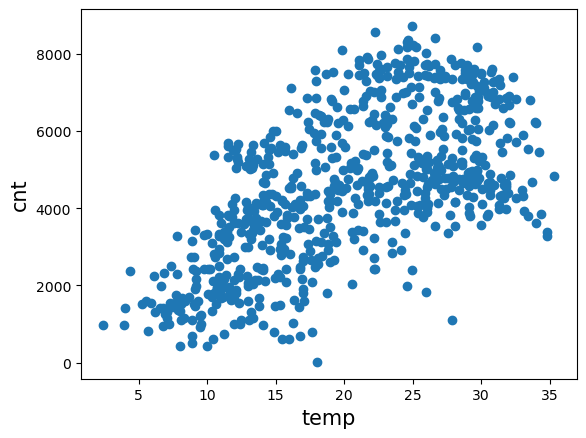

In [29]:
plt.scatter(x='temp',y='cnt',data=bikes)
plt.xlabel('temp',fontsize=15)
plt.ylabel('cnt',fontsize=15)
plt.show()

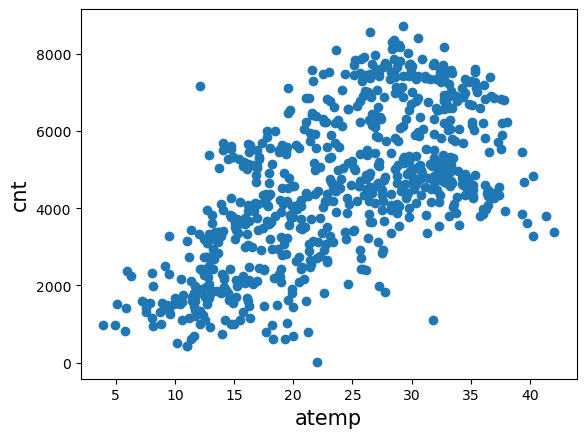

In [33]:
plt.scatter(x='atemp',y='cnt',data=bikes)
plt.xlabel('atemp',fontsize=15)
plt.ylabel('cnt',fontsize=15)
plt.show()

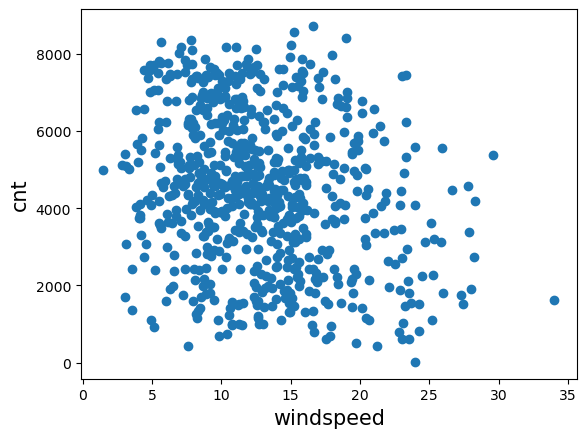

In [35]:
plt.scatter(x='windspeed',y='cnt',data=bikes)
plt.xlabel('windspeed',fontsize=15)
plt.ylabel('cnt',fontsize=15)
plt.show()

#### Visualising all the numerical variables of bikes dataframe

<Figure size 1500x1200 with 0 Axes>

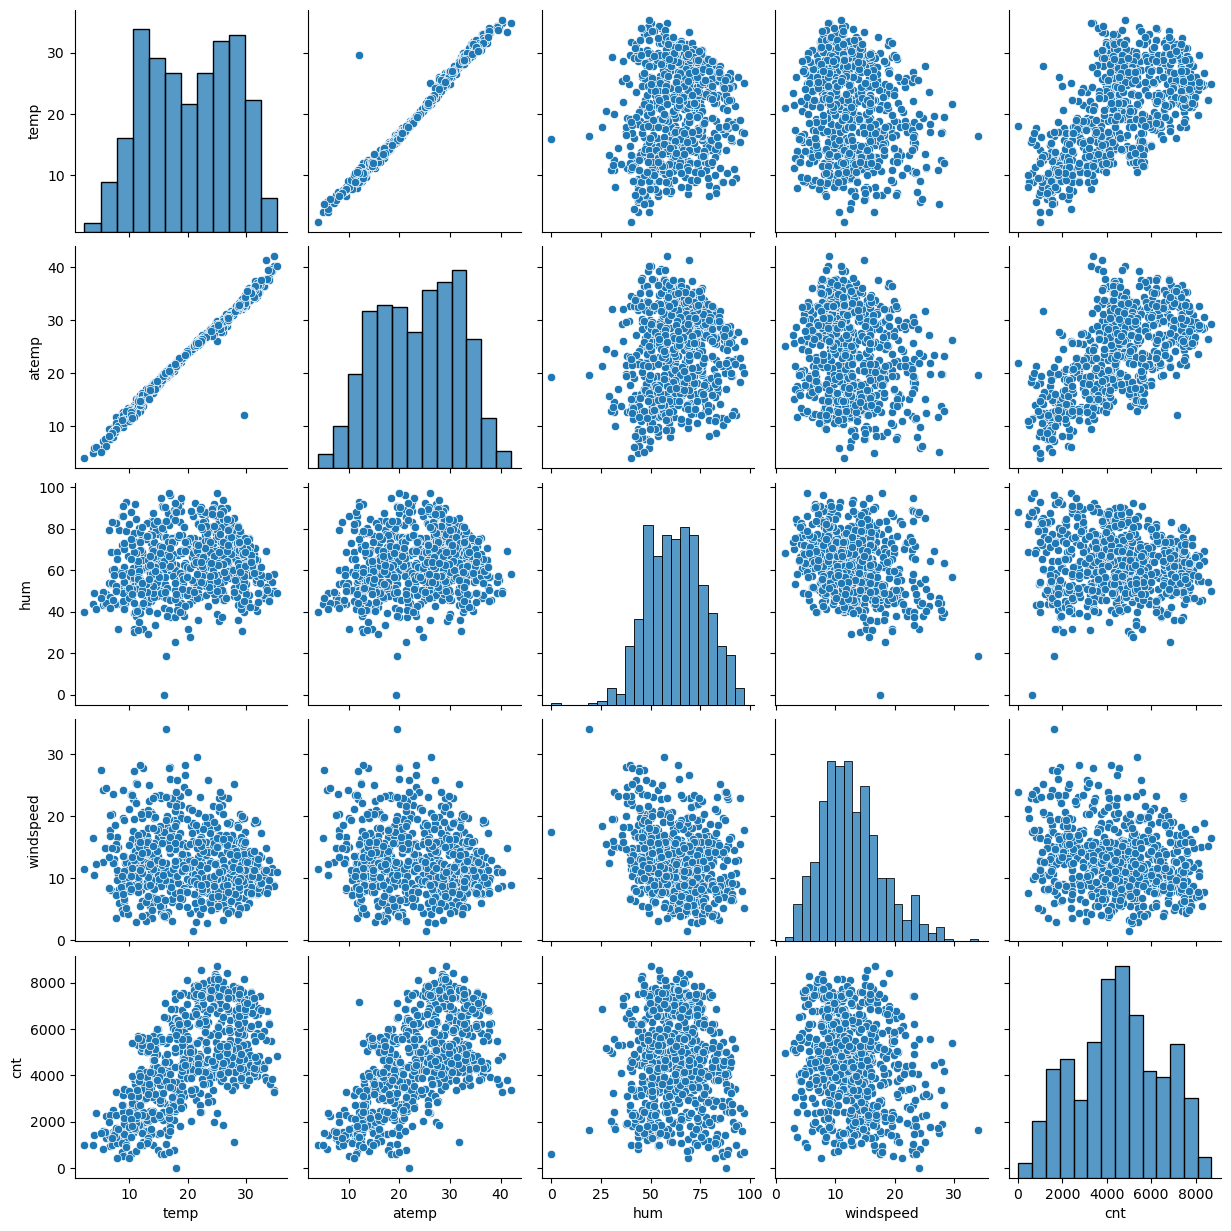

In [38]:
#plotting each numerical variable
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=[15,12])
sns.pairplot(bikes[num_vars])
plt.show()

Insights:
The scatter plots show that 'cnt' (bike demand) is positively related to both 'temp' (temperature) and 'atemp' (apparent temperature). This means that 'temp' and 'atemp' are closely linked to each other. Since they provide similar information, we can drop one of them. Since 'temp' makes more sense, I am removing the 'atemp' variable.

In [40]:
# dropping 'atemp' variable
bikes.drop(['atemp'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


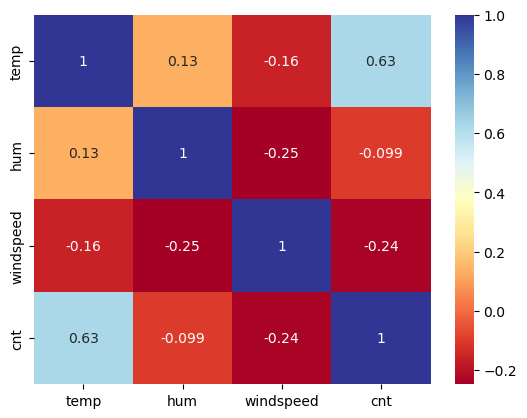

In [42]:
# checking correlation of numerical variable
num_var=['temp', 'hum', 'windspeed', 'cnt']
sns.heatmap(bikes[num_var].corr(),annot=True,cmap='RdYlBu')
plt.show()

insight-temp seems to be strongly related with cnt

#### Handling Categorical Variables

Before visualising categorical variables, we need to do some modifications to some of them.
We need to convert variables 'season', 'weathersit', 'mnth' and 'weekday' to categorical string values because the numeric values associated with these labels may indicate that there is some order to them, which is actually not the case. Converting them will also help in better visualisation and ease our process of creating dummy variables out of them.

In [45]:
# First, I aml converting 'season' to categorical string values

bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

weathersit : 

		- 1:clear= Clear, Few clouds, Partly cloudy, Partly cloudy

		- 2: mist=Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

		- 3:light= Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

		- 4: heavy=Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [47]:
#similary I am converting 'weathersit' to categorical variable
bikes['weathersit'] = bikes['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})

In [49]:
bikes['weathersit'].value_counts()

weathersit
clear    463
mist     246
light     21
Name: count, dtype: int64

insight- when the weather is 'heavy' no bikes are rented .

In [51]:
# converting 'mnth' to categorical string values
bikes['mnth'] = bikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [53]:
bikes['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [55]:
#converting 'weekday' to categorical string values
bikes['weekday'] = bikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [57]:
bikes['weekday'].value_counts()

weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64

In [59]:
# after conversion looking into top 5 rows of bikes
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


#### univariate analysis of some  categorical variable

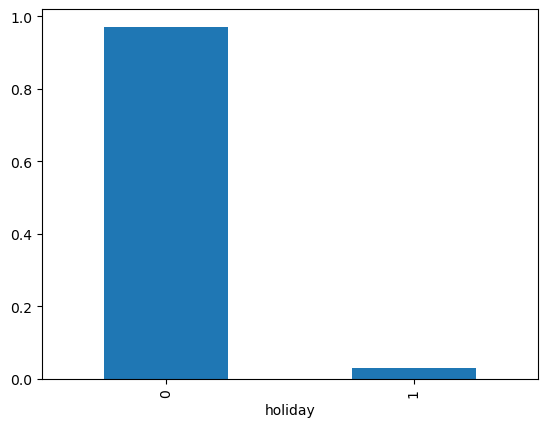

In [66]:
bikes.holiday.value_counts(normalize=True).plot.bar()
plt.show()

insight-there are very less holidays 

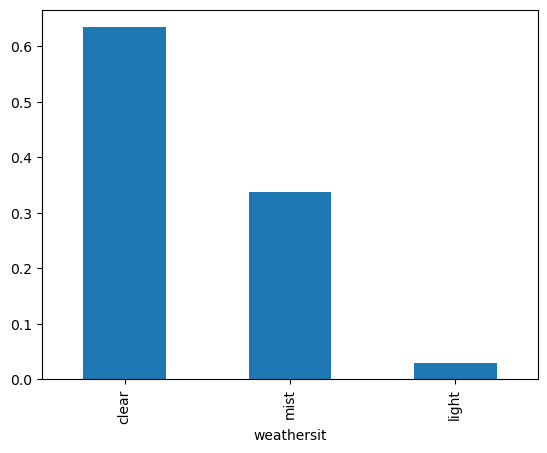

In [68]:
bikes.weathersit.value_counts(normalize=True).plot.bar()
plt.show()

insight-for most of the time there is clear weather,there is no heavy weather.

#### bivariate analysis

In [73]:
#### visualising target variable across each categorical variables 
cat_vars=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

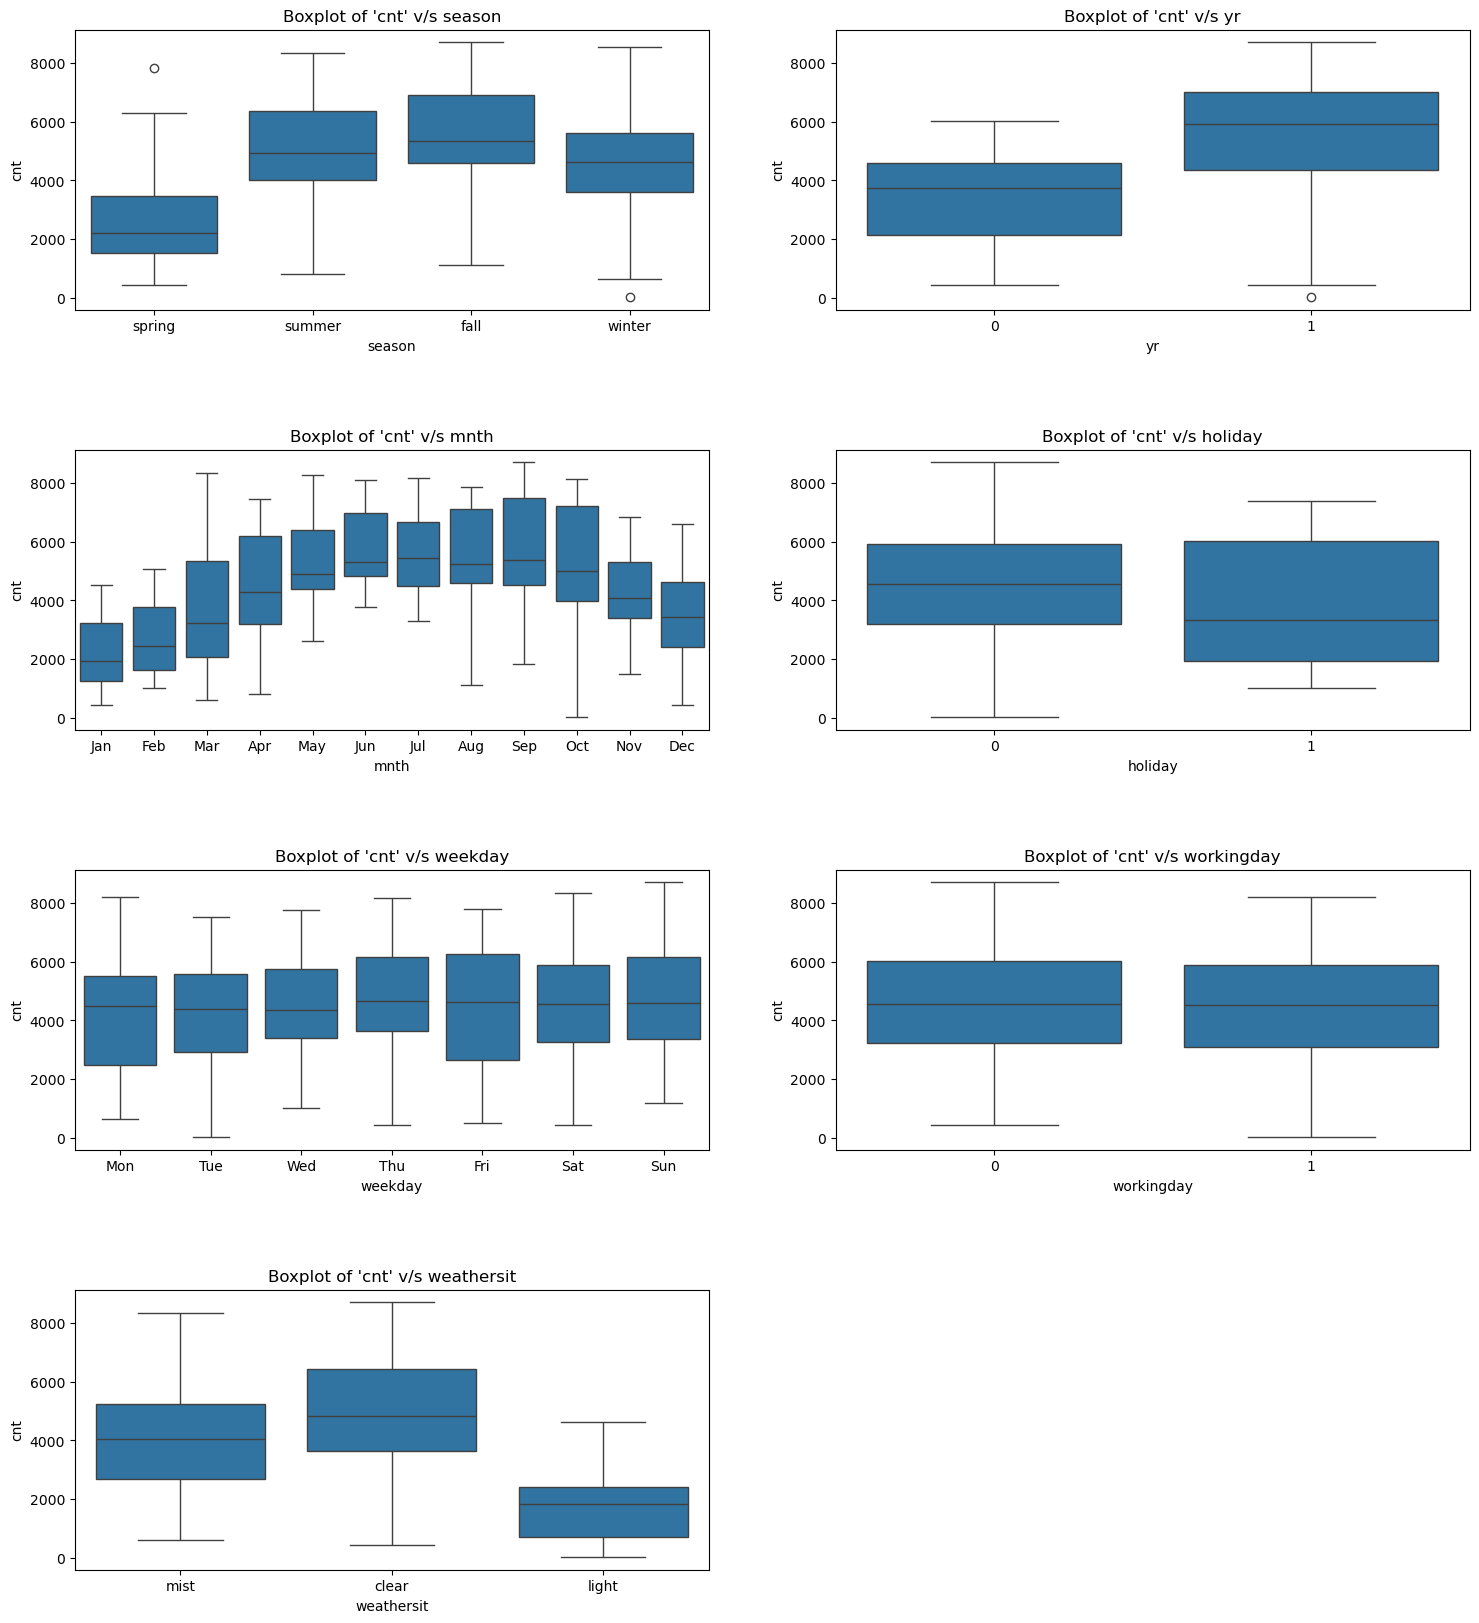

In [75]:
plt.figure(figsize=(18,20))
plt.subplots_adjust(hspace=.5)
for i, col in enumerate(cat_vars):
    plt.subplot(4,2,i+1)
    plt.title(label="Boxplot of 'cnt' v/s " + col)
    sns.boxplot(x=col, y='cnt', data=bikes)
plt.show();

Inferences:

- in fall and summer more bikes are rented, and from May to October months

- number of bikes  rented in 2019 is more than in 2018.
    
- more bikes are rented If the weather is clear (or having few clouds).  In heavy weather no bikes are rented.
    
- Rest of the features holiday, workingday and weekday don't show any discernible pattern .

- in holidays less bikes are rented.

- The data is well behaving with very few outliers.

#### doing multivariate analysis 

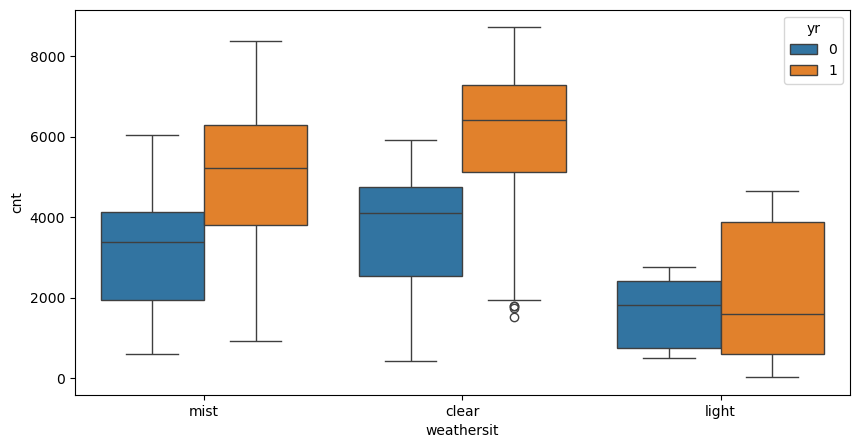

In [79]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = bikes)
plt.show()

insight-
- in mist and cloudy weather situation ,more bikes are rented in 2019
 
- in clear weather situation more bike are rented in 2019
 
- in light snow,light rain more bikes are rented in 2018
  
- in overall more bikes are rented in clear weather situation and in year 2019

#### Data Preparation

In [86]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


#### creating dummy variable

In [88]:
# I am Creating dummy variables for  four features 'season', 'mnth', 'weekday', 'weathersit' and then dropping the original feature as the information 
varlist = ['season', 'mnth', 'weekday', 'weathersit']
dummy1 = pd.get_dummies(bikes[varlist], drop_first=True)
dummy1=dummy1.apply(lambda x:x.map({False:0,True:1}))
bikes = pd.concat([bikes, dummy1], axis=1)
bikes = bikes.drop(varlist, axis=1)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# checking the null counts
bikes.isnull().sum()

yr                  0
holiday             0
workingday          0
temp                0
hum                 0
windspeed           0
cnt                 0
season_spring       0
season_summer       0
season_winter       0
mnth_Aug            0
mnth_Dec            0
mnth_Feb            0
mnth_Jan            0
mnth_Jul            0
mnth_Jun            0
mnth_Mar            0
mnth_May            0
mnth_Nov            0
mnth_Oct            0
mnth_Sep            0
weekday_Mon         0
weekday_Sat         0
weekday_Sun         0
weekday_Thu         0
weekday_Tue         0
weekday_Wed         0
weathersit_light    0
weathersit_mist     0
dtype: int64

#### Splitting Data into Train-Test and Scaling

In [92]:
df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### now I am scaling all the numerical columns

In [94]:
# not including dummy variables and Yes-No variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
#scaling using MinMaxScaler
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [96]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


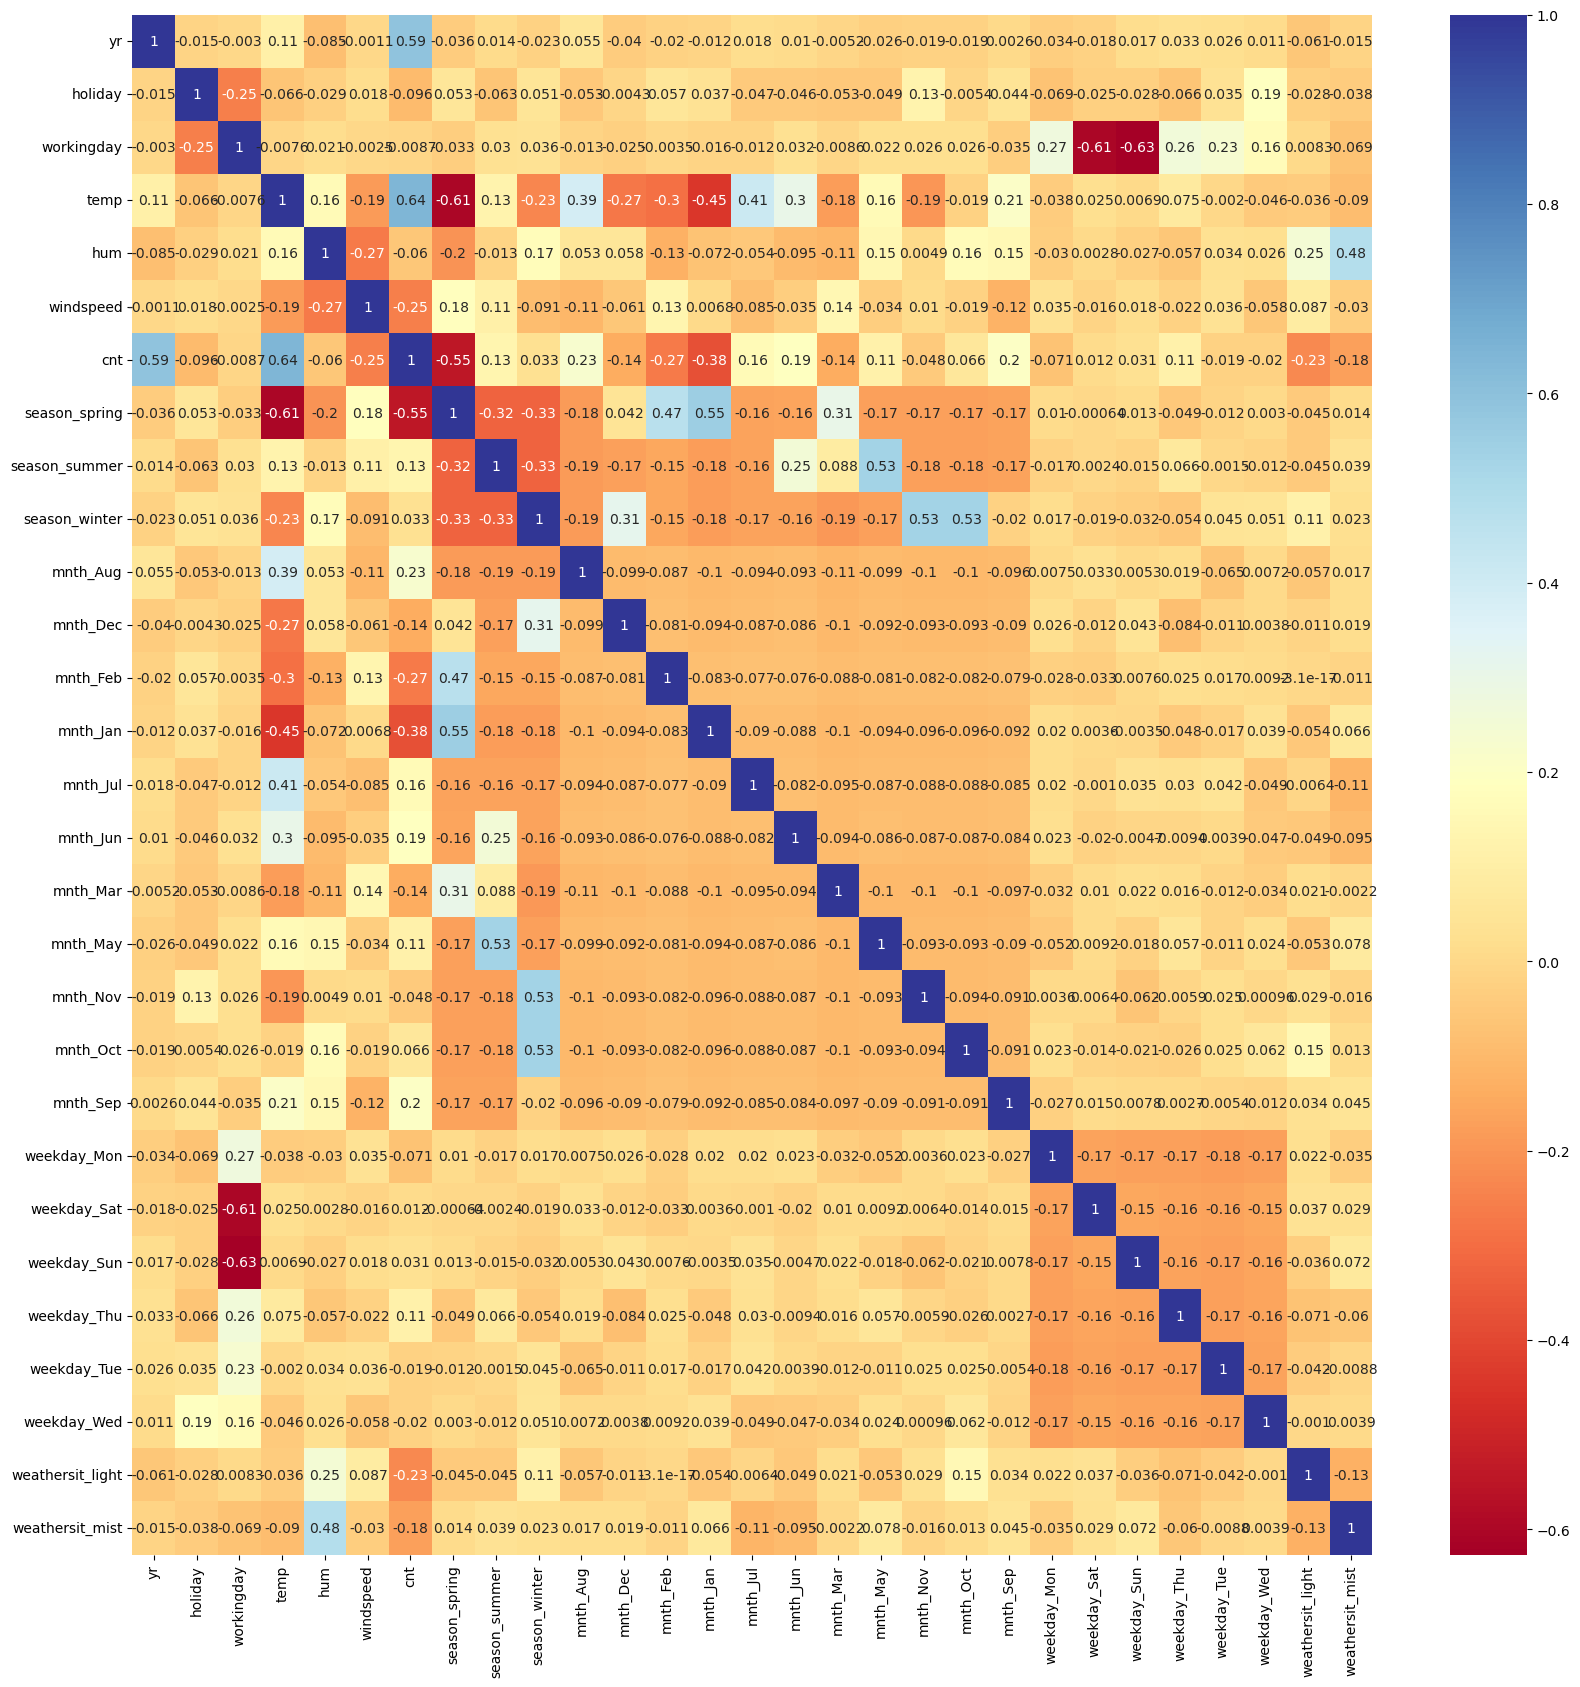

In [98]:
#Visualise correlations among the variables in training set
plt.figure(figsize=[20,20])
sns.heatmap(df_train.corr(),cmap='RdYlBu',annot=True)
plt.show()

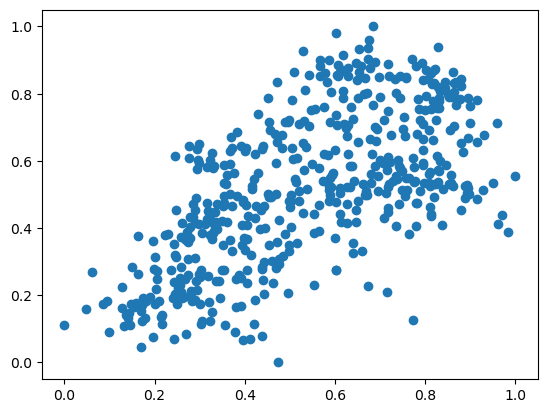

In [100]:
# plotting  a scatter plot between 'cnt' and the numeric variable 'temp' to see this correlation
plt.scatter(df_train.temp,df_train.cnt)
plt.show()

### Building a Linear Model

#### Dividing df_train into X and Y sets for the  building the model


In [102]:
y_train=df_train.pop('cnt')
X_train=df_train

### RFE(Recursive feature elimination)

In [104]:
# I am Running RFE with the output number of the variable = 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)     
rfe = rfe.fit(X_train, y_train)

In [106]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10),
 ('weathersit_light', True, 1),
 ('weathersit_mist', True, 1)]

In [108]:
Col = X_train.columns[rfe.support_]
Col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [110]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building the model using statsmodel for the detailed statistics

In [112]:
# Creating X_train  with rfe selected variables

X_train_rfe = X_train[Col]

In [114]:
# adding constant
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [116]:
X_train_lm.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_light,weathersit_mist
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


### Building the first linear model using statsmodels

In [118]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          3.34e-189
Time:                        16:56:49   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3202      0.036      8.886      0.000       0.249       0.391
yr                   0.2303      0.008     28.511      0.000       0.214       0.246
holiday             -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                 0.4800      0.037     12.977      0.000       0.407       0.553
hum                 -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed           -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring       -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer        0.0408      0.015      2.659      0.008       0.011       0.071
season_winter        0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec            -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan            -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul            -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov            -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep             0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_light    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_mist     -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# Variance Inflation Factor or VIF, will give a basic quantitative idea about how much the feature variables are correlated with each other. 
# Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_mist,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


####  We will drop feature hum which has highest VIF of 30.94

In [122]:
# dropping season_Spring since its vif > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

### building the second linear model 

In [124]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          1.57e-186
Time:                        16:57:44   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2466      0.032      7.679      0.000       0.184       0.310
yr                   0.2343      0.008     28.709      0.000       0.218       0.250
holiday             -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                 0.4377      0.036     12.083      0.000       0.366       0.509
windspeed           -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring       -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer        0.0333      0.015      2.148      0.032       0.003       0.064
season_winter        0.0887      0.018      4.951      0.000       0.053       0.124
mnth_Dec            -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan            -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_Jul            -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov            -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sep             0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_light    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_mist     -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_Nov,1.80
8,mnth_Jan,1.66
9,mnth_Jul,1.59
13,weathersit_mist,1.56


In [128]:
# dropping mnth_nov as it has both high p value and high vif
X_train_rfe = X_train_rfe.drop(['mnth_Nov'], axis=1)

#### building the third linear model

In [130]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          1.20e-186
Time:                        16:58:20   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2288      0.031      7.334      0.000       0.168       0.290
yr                   0.2342      0.008     28.584      0.000       0.218       0.250
holiday             -0.0988      0.026     -3.810      0.000      -0.150      -0.048
temp                 0.4582      0.035     13.047      0.000       0.389       0.527
windspeed           -0.1595      0.025     -6.304      0.000      -0.209      -0.110
season_spring       -0.0631      0.021     -2.976      0.003      -0.105      -0.021
season_summer        0.0391      0.015      2.550      0.011       0.009       0.069
season_winter        0.0788      0.017      4.529      0.000       0.045       0.113
mnth_Dec            -0.0293      0.016     -1.794      0.073      -0.061       0.003
mnth_Jan            -0.0451      0.018     -2.468      0.014      -0.081      -0.009
mnth_Jul            -0.0502      0.019     -2.707      0.007      -0.087      -0.014
mnth_Sep             0.0740      0.017      4.364      0.000       0.041       0.107
weathersit_light    -0.2888      0.025    -11.731      0.000      -0.337      -0.240
weathersit_mist     -0.0807      0.009     -9.245      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       63.255   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.585
Skew:                          -0.660   Prob(JB):                     8.96e-33
Kurtosis:                       5.281   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
# Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
6,season_winter,2.06
8,mnth_Jan,1.65
9,mnth_Jul,1.59
12,weathersit_mist,1.56
10,mnth_Sep,1.34


In [134]:
# dropping mnth_Dec as it has  high p value
X_train_rfe = X_train_rfe.drop(['mnth_Dec'], axis=1)

#### building the fourth linear model

In [136]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_lm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          3.97e-187
Time:                        16:59:18   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2155      0.030      7.096      0.000       0.156       0.275
yr                   0.2342      0.008     28.524      0.000       0.218       0.250
holiday             -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp                 0.4728      0.034     13.803      0.000       0.405       0.540
windspeed           -0.1549      0.025     -6.140      0.000      -0.205      -0.105
season_spring       -0.0615      0.021     -2.898      0.004      -0.103      -0.020
season_summer        0.0422      0.015      2.766      0.006       0.012       0.072
season_winter        0.0771      0.017      4.424      0.000       0.043       0.111
mnth_Jan            -0.0380      0.018     -2.125      0.034      -0.073      -0.003
mnth_Jul            -0.0507      0.019     -2.728      0.007      -0.087      -0.014
mnth_Sep             0.0762      0.017      4.500      0.000       0.043       0.110
weathersit_light    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
weathersit_mist     -0.0807      0.009     -9.222      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,season_spring,2.75
5,season_summer,2.22
0,yr,2.07
6,season_winter,1.79
7,mnth_Jan,1.61
8,mnth_Jul,1.59
11,weathersit_mist,1.56
9,mnth_Sep,1.34


In [140]:
# dropping mnth_Jan as it has  high p value
X_train_rfe = X_train_rfe.drop(['mnth_Jan'], axis=1)

#### building the fifth linear model

In [142]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train, X_train_lm).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          2.40e-187
Time:                        16:59:40   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1996      0.030      6.758      0.000       0.142       0.258
yr                   0.2335      0.008     28.361      0.000       0.217       0.250
holiday             -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp                 0.4915      0.033     14.798      0.000       0.426       0.557
windspeed           -0.1480      0.025     -5.893      0.000      -0.197      -0.099
season_spring       -0.0669      0.021     -3.167      0.002      -0.108      -0.025
season_summer        0.0453      0.015      2.971      0.003       0.015       0.075
season_winter        0.0831      0.017      4.818      0.000       0.049       0.117
mnth_Jul            -0.0524      0.019     -2.811      0.005      -0.089      -0.016
mnth_Sep             0.0767      0.017      4.511      0.000       0.043       0.110
weathersit_light    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
weathersit_mist     -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
# Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.21
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.79
7,mnth_Jul,1.58
10,weathersit_mist,1.55
8,mnth_Sep,1.34
9,weathersit_light,1.08


In [146]:
# dropping mnth_Jul as it has  high p value
X_train_rfe = X_train_rfe.drop(['mnth_Jul'], axis=1)

#### building the sixth linear model

In [148]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train, X_train_lm).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          7.36e-187
Time:                        16:59:53   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1910      0.030      6.456      0.000       0.133       0.249
yr                   0.2341      0.008     28.246      0.000       0.218       0.250
holiday             -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp                 0.4782      0.033     14.446      0.000       0.413       0.543
windspeed           -0.1482      0.025     -5.860      0.000      -0.198      -0.098
season_spring       -0.0551      0.021     -2.641      0.009      -0.096      -0.014
season_summer        0.0610      0.014      4.271      0.000       0.033       0.089
season_winter        0.0959      0.017      5.730      0.000       0.063       0.129
mnth_Sep             0.0909      0.016      5.565      0.000       0.059       0.123
weathersit_light    -0.2860      0.025    -11.492      0.000      -0.335      -0.237
weathersit_mist     -0.0801      0.009     -9.090      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.89
6,season_winter,1.63
9,weathersit_mist,1.54
7,mnth_Sep,1.23
8,weathersit_light,1.08
1,holiday,1.04


cosidering the model  lr_6, as it have very low multicolinearity between the predictors and the p-value
for  the predictors is significant.
F-Statistics value of 249.2 states that the overall model is significant.

In [152]:
#Now I am  Checking the parameters and the coefficient values of lm_6
lm_6.params

const               0.190994
yr                  0.234060
holiday            -0.096865
temp                0.478177
windspeed          -0.148155
season_spring      -0.055092
season_summer       0.060987
season_winter       0.095929
mnth_Sep            0.090932
weathersit_light   -0.286002
weathersit_mist    -0.080124
dtype: float64

### Doing Residual Analysis of the train dataset and validation

In [154]:
X_train_lm

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Sep,weathersit_light,weathersit_mist
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,1,0,0,0,1
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1


In [156]:
y_train_pred = lm_6.predict(X_train_lm)

#### Normality of error terms

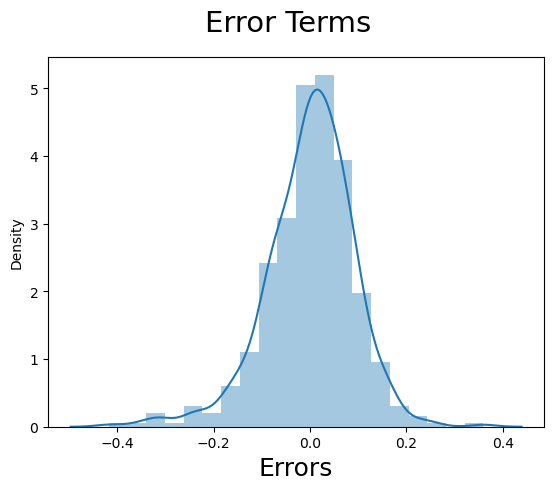

In [158]:
# Plotting  the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 21) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

By looking the plot we can say Error terms are following normal distribution

#### Multi Colinearity

In [160]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.89
6,season_winter,1.63
9,weathersit_mist,1.54
7,mnth_Sep,1.23
8,weathersit_light,1.08
1,holiday,1.04


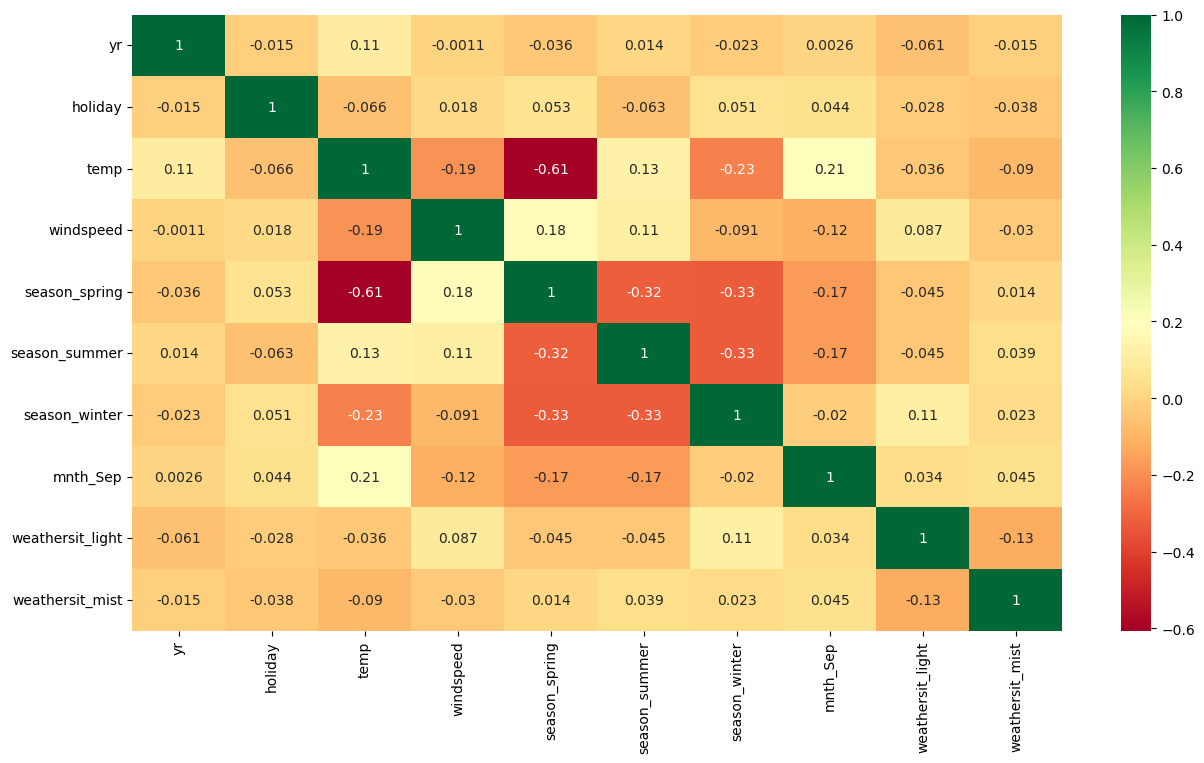

In [162]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also we can observe that there  is no multicolinearity from the heatmap.

#### Linearity

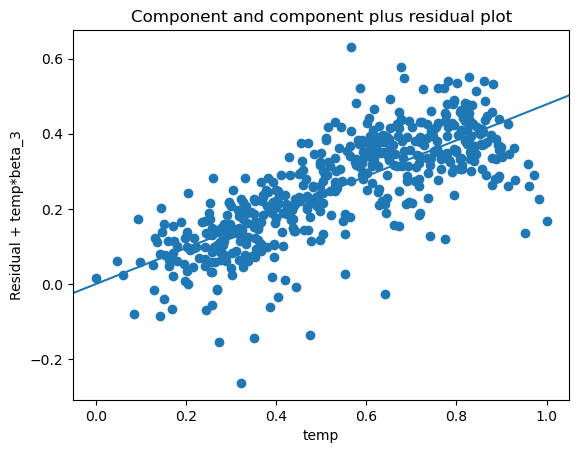

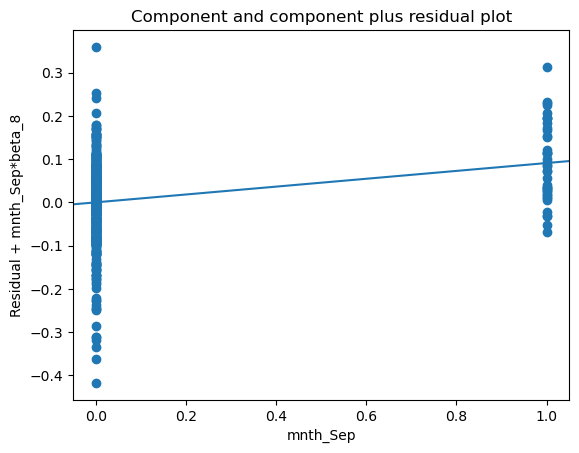

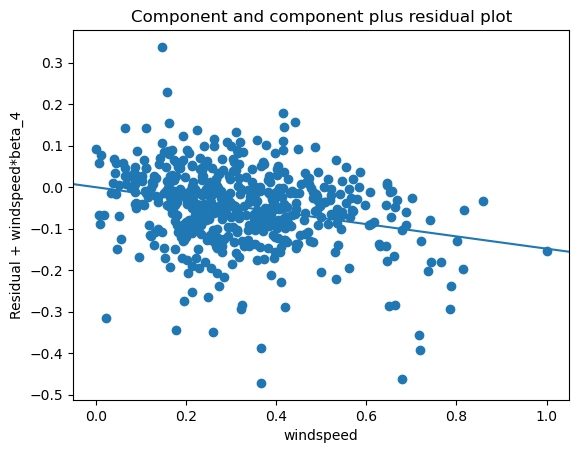

In [164]:
sm.graphics.plot_ccpr(lm_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm_6, 'mnth_Sep')
plt.show()

sm.graphics.plot_ccpr(lm_6, 'windspeed')
plt.show()

 we can observe linearity from above visualizations.

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, now we will make predictions using the final, i.e. sixth model.

In [166]:
# scaling the test_df
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [168]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
y_test = df_test.pop('cnt')
X_test = df_test

In [172]:
col = X_train_rfe.columns

X_test = X_test[col]

# Now I am adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [174]:
y_pred = lm_6.predict(X_test_lm_6)

#### calculating R square value

In [176]:
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_pred))

r2_score of train dataset 0.8331701190996619
r2_score of test dataset 0.8035441330582012


It can be seen that the r_squared on the test set is aprox 0.8035 and the r-squared on the trained set is approx 0.833 which is quiet reasonable 
and nearly equal, which means that whatever data the model was trained with, model is  able to apply those learnings in the test dataset.

### Model Evaluation

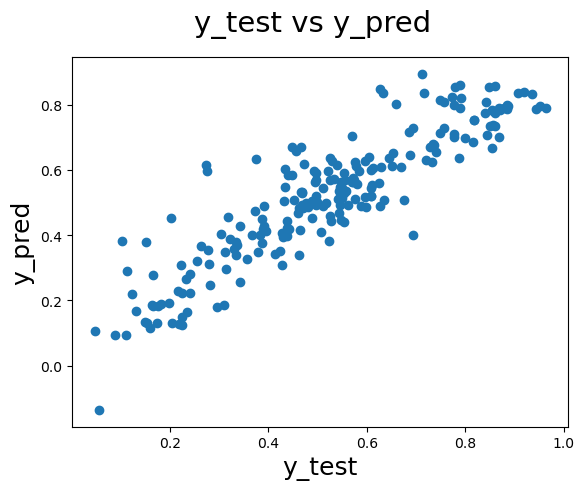

In [178]:
#Let's now plot the graph for actual versus predicted values.

# I am Plotting y_test and y_pred for understanding the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 21) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 18) 
plt.show()

In [180]:
round(lm_6.params,4)

const               0.1910
yr                  0.2341
holiday            -0.0969
temp                0.4782
windspeed          -0.1482
season_spring      -0.0551
season_summer       0.0610
season_winter       0.0959
mnth_Sep            0.0909
weathersit_light   -0.2860
weathersit_mist    -0.0801
dtype: float64

#### So I concluded that the equation of our best fitted line is:

 cnt=0.1910+0.2341*yr-0.0969*holiday+0.4782*temp-0.1482*windspeed-0.0551*season_spring +0.0610*season_summer+0.0959*season_winter+0.0909*mnth_Sep-0.2860*weathersit_light-0.0801*weathersit_mist 

In [182]:
# Calculating Adjusted-R^2 value for the test dataset
r2 = r2_score(y_test, y_pred)
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7941


#### Visualizing the fitness on the test dataset

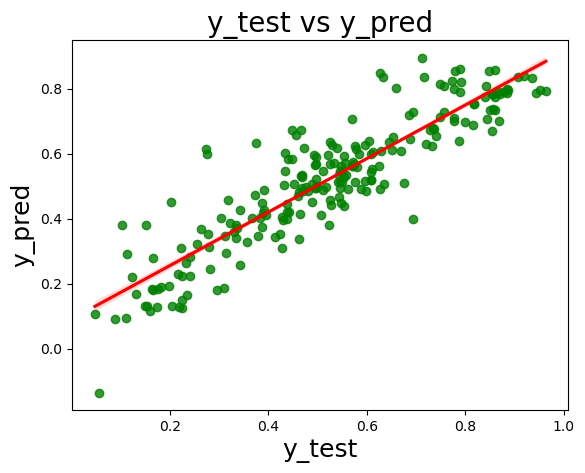

In [184]:

# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)
plt.show()

#### Comparing  Training and Test dataset:

- Train dataset R^2          : 0.833

- Test dataset R^2           : 0.8035

- Train dataset Adjusted R^2 : 0.830  

- Test dataset Adjusted R^2  : 0.7941

#### Conclusion

#### Demand of bikes depend on year, holiday, temp, windspeed,season_spring,season_summer,season_winter ,mnth_Sep,weathersit_light,weathersit_mist
